In [83]:
import pandas as pd

In [84]:
df = pd.read_csv('/content/bank_transactions.csv')

In [85]:
df.shape

(1048567, 9)

In [86]:
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [87]:
df.isna().sum()/len(df)*100

,0
TransactionID,0.00
CustomerID,0.00
CustomerDOB,0.32
CustGender,0.10
CustLocation,0.01
CustAccountBalance,0.23
TransactionDate,0.00
TransactionTime,0.00
TransactionAmount (INR),0.00


In [88]:
df['CustLocation'].describe()

,CustLocation
count,1048416
unique,9355
top,MUMBAI
freq,103595


In [89]:
top_30 = df['CustLocation'].value_counts().head(30)
print(top_30)

CustLocation
MUMBAI           103595
NEW DELHI         84928
BANGALORE         81555
GURGAON           73818
DELHI             71019
NOIDA             32784
CHENNAI           30009
PUNE              25851
HYDERABAD         23049
THANE             21505
KOLKATA           19974
GHAZIABAD         15834
NAVI MUMBAI       13080
AHMEDABAD         12264
FARIDABAD         11318
JAIPUR             9921
CHANDIGARH         9526
LUCKNOW            7763
MOHALI             6741
SURAT              5770
NASHIK             4970
LUDHIANA           4928
VISAKHAPATNAM      4452
DEHRADUN           4301
INDORE             3891
VADODARA           3890
AMRITSAR           3823
AGRA               3636
NAGPUR             3586
COIMBATORE         3564
Name: count, dtype: int64


In [90]:
top_100 = df['CustLocation'].value_counts().head(100)
print(top_100)

CustLocation
MUMBAI               103595
NEW DELHI             84928
BANGALORE             81555
GURGAON               73818
DELHI                 71019
NOIDA                 32784
CHENNAI               30009
PUNE                  25851
HYDERABAD             23049
THANE                 21505
KOLKATA               19974
GHAZIABAD             15834
NAVI MUMBAI           13080
AHMEDABAD             12264
FARIDABAD             11318
JAIPUR                 9921
CHANDIGARH             9526
LUCKNOW                7763
MOHALI                 6741
SURAT                  5770
NASHIK                 4970
LUDHIANA               4928
VISAKHAPATNAM          4452
DEHRADUN               4301
INDORE                 3891
VADODARA               3890
AMRITSAR               3823
AGRA                   3636
NAGPUR                 3586
COIMBATORE             3564
KANPUR                 3542
MEERUT                 3395
PANCHKULA              3311
AURANGABAD             3310
GREATER NOIDA          3264
GUWAHAT

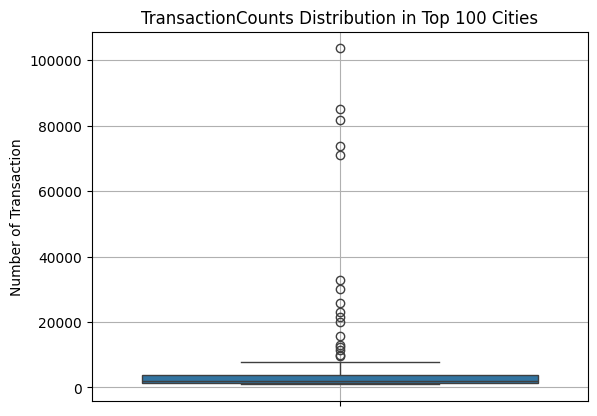

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

top_100_df = top_100.reset_index()
top_100_df.columns = ['CustLocation', 'TransactionCounts']

sns.boxplot(y=top_100_df['TransactionCounts'])
plt.title('TransactionCounts Distribution in Top 100 Cities')
plt.ylabel('Number of Transaction')
plt.grid(True)
plt.show()

In [92]:
total_customers = top_100_df['TransactionCounts'].sum()
print(total_customers)

823247


In [93]:
pd.set_option('display.max_rows', None)
print(top_100)

CustLocation
MUMBAI               103595
NEW DELHI             84928
BANGALORE             81555
GURGAON               73818
DELHI                 71019
NOIDA                 32784
CHENNAI               30009
PUNE                  25851
HYDERABAD             23049
THANE                 21505
KOLKATA               19974
GHAZIABAD             15834
NAVI MUMBAI           13080
AHMEDABAD             12264
FARIDABAD             11318
JAIPUR                 9921
CHANDIGARH             9526
LUCKNOW                7763
MOHALI                 6741
SURAT                  5770
NASHIK                 4970
LUDHIANA               4928
VISAKHAPATNAM          4452
DEHRADUN               4301
INDORE                 3891
VADODARA               3890
AMRITSAR               3823
AGRA                   3636
NAGPUR                 3586
COIMBATORE             3564
KANPUR                 3542
MEERUT                 3395
PANCHKULA              3311
AURANGABAD             3310
GREATER NOIDA          3264
GUWAHAT

In [94]:
df_Fact1 = df

In [95]:
df_Fact1 = df_Fact1.dropna()

In [96]:
df_Fact1.isna().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,0
CustGender,0
CustLocation,0
CustAccountBalance,0
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [97]:
#The deleted data is less than 0.7% of the total data size.
df_Fact1.shape

(1041614, 9)

In [98]:
from datetime import datetime

In [99]:
df_Fact1['CustomerDOB'] = pd.to_datetime(df_Fact1['CustomerDOB'], dayfirst=True, errors='coerce')

current_year = 2025
df_Fact1['Age'] = current_year - df_Fact1['CustomerDOB'].dt.year

<ipython-input-99-3968a2158185>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_Fact1['CustomerDOB'] = pd.to_datetime(df_Fact1['CustomerDOB'], dayfirst=True, errors='coerce')
<ipython-input-99-3968a2158185>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1['CustomerDOB'] = pd.to_datetime(df_Fact1['CustomerDOB'], dayfirst=True, errors='coerce')
<ipython-input-99-3968a2158185>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [100]:
df_Fact1.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00,31
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.00,-32
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.00,29
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.00,-48
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50,37
5,T6,C1536588,2072-10-08,F,ITANAGAR,53609.20,2/8/16,173940,676.00,-47
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2/8/16,173806,566.00,33
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2/8/16,170537,148.00,43
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2/8/16,192825,833.00,37
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2/8/16,192446,289.11,41


In [101]:
df_Fact1.dtypes

,0
TransactionID,object
CustomerID,object
CustomerDOB,datetime64[ns]
CustGender,object
CustLocation,object
CustAccountBalance,float64
TransactionDate,object
TransactionTime,int64
TransactionAmount (INR),float64
Age,int64


In [102]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_Fact1['Age'].describe()

,Age
count,1041614.00
mean,39.96
std,50.36
min,-49.00
25%,33.00
50%,37.00
75%,42.00
max,225.00


In [103]:
#Check age and transaction error amount
age_error_amount = df_Fact1[(df_Fact1['Age'] < 1) | (df_Fact1['Age'] > 100)].shape[0]
print(f'age_error_amount: {age_error_amount}')

transaction_error_amount = df_Fact1[df_Fact1['TransactionAmount (INR)'] <= 1].shape[0]
print(f'transaction_error_amount: {transaction_error_amount}')

age_error_amount: 161082
transaction_error_amount: 5704


In [104]:
# Remove age and transaction error
df_Fact1_clean = df_Fact1[(df_Fact1['Age'] >= 1) & (df_Fact1['Age'] <= 100) & (df_Fact1['TransactionAmount (INR)'] >= 1)]

In [105]:
df_Fact1_clean.shape

(879665, 10)

In [106]:
df_Fact1_clean['Age'].describe()

,Age
count,879665.00
mean,37.71
std,5.17
min,1.00
25%,34.00
50%,37.00
75%,41.00
max,50.00


In [107]:
df_Fact1_clean['TransactionAmount (INR)'].describe()

,TransactionAmount (INR)
count,879665.00
mean,1272.30
std,5407.01
min,1.00
25%,147.00
50%,396.00
75%,1000.00
max,1560034.99


In [108]:
df_Fact1_clean.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00,31
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.00,29
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50,37
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2/8/16,173806,566.00,33
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2/8/16,170537,148.00,43
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2/8/16,192825,833.00,37
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2/8/16,192446,289.11,41
10,T11,C5430833,1982-07-22,M,MOHALI,48429.49,2/8/16,204133,259.00,43
11,T12,C6939838,1988-07-07,M,GUNTUR,14613.46,2/8/16,205108,202.00,37
12,T13,C6339347,1978-06-13,M,AHMEDABAD,32274.78,2/8/16,203834,12300.00,47


In [109]:
#convert TransectionDate to datetime type
df_Fact1_clean['TransactionDate'] = pd.to_datetime(df_Fact1_clean['TransactionDate'], dayfirst=True, errors='coerce')

<ipython-input-109-8cc306abbf17>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_Fact1_clean['TransactionDate'] = pd.to_datetime(df_Fact1_clean['TransactionDate'], dayfirst=True, errors='coerce')
<ipython-input-109-8cc306abbf17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1_clean['TransactionDate'] = pd.to_datetime(df_Fact1_clean['TransactionDate'], dayfirst=True, errors='coerce')


In [110]:
#filter Transectiondate error
future_transactions = df_Fact1_clean[df_Fact1_clean['TransactionDate'] >= '2025-01-01']
pre_birth_transactions = df_Fact1_clean[df_Fact1_clean['TransactionDate'] <= df_Fact1_clean['CustomerDOB']]

In [111]:
print("the transactiondate after 2025：", future_transactions.shape[0])
print("the transactiondate before birth：", pre_birth_transactions.shape[0])

the transactiondate after 2025： 0
the transactiondate before birth： 44


In [112]:
#Drop transactiondate error
invalid_transactions = (df_Fact1_clean['TransactionDate'] >= '2025-01-01') | \
                       (df_Fact1_clean['TransactionDate'] <= df_Fact1_clean['CustomerDOB'])

df_Fact1_clean1 = df_Fact1_clean[~invalid_transactions]

In [115]:
df_Fact1_clean.shape

(879665, 10)

In [117]:
#Final data shape
df_Fact1_clean1.shape

(879621, 10)